# Discussion5

### HTML, XML  and JSON (from Nick)

In [2]:
import numpy as np
import pandas as pd
import requests

## Example1: Github Jobs again

In [177]:
url='https://jobs.github.com/positions?description=python&location=new+york'

In [178]:
res=requests.get(url)

In [179]:
res.status_code

200

In [189]:
res.text

'\n<!DOCTYPE html>\n<html>\n  <head>\n    <title>\n      Job Listings &mdash;\n      GitHub Jobs\n    </title>\n\n    <meta name="csrf-param" content="authenticity_token" />\n<meta name="csrf-token" content="kwMzc/l7sQGC+JyQ0pgd89kmuSPTxc0smDrPnOQEuKnQ65nOwkFfeS2+t9MZkyBJmKjBaoSsJZIKBMV5Wo+OLA==" />\n    <meta name="csp-nonce" content="WyCCaGXx100b//i0m3E8fA==" />\n\n\n    <link rel="stylesheet" media="all" href="/assets/application-8a0cea4b3c1077a7417cbdcfe673a88324c7ba0eebeed02e897c67742f3632d7.css" />\n    <script src="/assets/application-5401ee2776c139ee29485890cb53ebf70c80548481072f4460c24424d23972e0.js"></script>\n    \n\n    \n  <script nonce="WyCCaGXx100b//i0m3E8fA==">\n//<![CDATA[\n\n    var _gaq = _gaq || [];\n    _gaq.push([\'_setAccount\', \'UA-3769691-9\']);\n    _gaq.push([\'_trackPageview\']);\n\n    (function() {\n      var ga = document.createElement(\'script\'); ga.type = \'text/javascript\'; ga.async = true;\n      ga.src = (\'https:\' == document.location.protocol ?

In [3]:
import lxml.html as lx

In [180]:
html = lx.fromstring(res.text)
html

<Element html at 0x124a90318>

In [192]:
html.xpath("/html/head")

[<Element head at 0x10cb64bd8>]

In [193]:
html.xpath("/head")

[]

In [194]:
html.xpath("//head")

[<Element head at 0x10cb64bd8>]

In [195]:
html.xpath("/html/head")[0].text_content()

"\n    \n      Job Listings —\n      GitHub Jobs\n    \n\n    \n\n    \n\n\n    \n    \n    \n\n    \n  \n//<![CDATA[\n\n    var _gaq = _gaq || [];\n    _gaq.push(['_setAccount', 'UA-3769691-9']);\n    _gaq.push(['_trackPageview']);\n\n    (function() {\n      var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;\n      ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';\n      var s = document.getElementsByTagName('script')[0]; s.parentNode.insertBefore(ga, s);\n    })();\n\n//]]>\n\n  "

In [196]:
html.xpath("/html/head")[0].getchildren()

[<Element title at 0x10bf25a48>,
 <Element meta at 0x10bf25e58>,
 <Element meta at 0x10bf259f8>,
 <Element meta at 0x10a0dadb8>,
 <Element link at 0x10a0da098>,
 <Element script at 0x10a0dad68>,
 <Element script at 0x10a0da048>]

In [197]:
html.xpath("/html//p")

[<Element p at 0x10bf25ae8>,
 <Element p at 0x10a0da138>,
 <Element p at 0x10a0da278>,
 <Element p at 0x10a0da188>,
 <Element p at 0x10a0da1d8>,
 <Element p at 0x10a0daf98>,
 <Element p at 0x10a0da598>,
 <Element p at 0x10a0da908>,
 <Element p at 0x10a0dae08>,
 <Element p at 0x10cd757c8>]

In [198]:
html.xpath("/html//p")[0].text_content()

'\n\t\t\t\t\t\tSimons Foundation\n\t\t\t\t\t\t–\n            Full Time'

In [199]:
html.xpath("/html//p")[1].text_content()

'\n\t\t\t\t\t\tCrowdTwist\n\t\t\t\t\t\t–\n            Full Time'

In [200]:
[x.text_content() for x in html.xpath("/html//p") ]

['\n\t\t\t\t\t\tSimons Foundation\n\t\t\t\t\t\t–\n            Full Time',
 '\n\t\t\t\t\t\tCrowdTwist\n\t\t\t\t\t\t–\n            Full Time',
 '\n\t\t\t\t\t\tAon Cyber Solutions\n\t\t\t\t\t\t–\n            Full Time',
 '\n\t\t\t\t\t\tSesame\n\t\t\t\t\t\t–\n            Full Time',
 '\n\t\t\t\t\t\tNew York University\n\t\t\t\t\t\t–\n            Full Time',
 'Subscribe and we’ll send you a summary once a week if new jobs are posted to this list.',
 '\n      Subscribe to updates\n    ',
 'We promise not to spam or share your email.',
 'Expect an email with new listings soon!',
 '\n          © 2019 GitHub Inc. All rights reserved.\n        ']

In [203]:
html.xpath("/html//p")[0].getchildren()

[<Element a at 0x103a1a6d8>, <Element strong at 0x106d24688>]

In [226]:
html.xpath("/html//p")[0].getchildren()[0].tag

'a'

In [204]:
html.xpath("/html//p")[0].getchildren()[0].attrib

{'class': 'company', 'href': 'https://jobs.github.com/companies/simons-foundation'}

In [205]:
html.xpath("/html//p")[0].getchildren()[0].attrib['href']

'https://jobs.github.com/companies/simons-foundation'

In [206]:
html.xpath("//a")

[<Element a at 0x101987e08>,
 <Element a at 0x10a2ff228>,
 <Element a at 0x10a2ff688>,
 <Element a at 0x10a3ebb38>,
 <Element a at 0x10a3ebef8>,
 <Element a at 0x103a1a6d8>,
 <Element a at 0x10a3ebcc8>,
 <Element a at 0x109b26908>,
 <Element a at 0x109ee7a98>,
 <Element a at 0x109ee79f8>,
 <Element a at 0x109ee7c78>,
 <Element a at 0x10a44e138>,
 <Element a at 0x109ebeef8>,
 <Element a at 0x10a9ecb88>,
 <Element a at 0x10ba544f8>,
 <Element a at 0x10a53ae58>,
 <Element a at 0x10a53a818>,
 <Element a at 0x10a53ac78>,
 <Element a at 0x10a53aa98>,
 <Element a at 0x10b4dfef8>,
 <Element a at 0x10a3ed4a8>,
 <Element a at 0x106d8f1d8>,
 <Element a at 0x106d8f638>]

In [188]:
[ x.text_content() for x in html.xpath("//h4//a") ]

['Web Developer',
 'Lead Data Engineer',
 'Cybersecurity Firm Seeks Senior Developer',
 'Software engineer (back end)',
 'Technology Solutions Developer']

In [212]:
[ x.attrib['href'] for x in html.xpath("//a[@class='company']") ]

['https://jobs.github.com/companies/simons-foundation',
 'https://jobs.github.com/companies/crowdtwist',
 'https://jobs.github.com/companies/aon-cyber-solutions',
 'https://jobs.github.com/companies/sesame',
 'https://jobs.github.com/companies/new-york-university']

## Example2: Hacker News

In [4]:
# Step 1: download
url2 = "https://news.ycombinator.com/"
response2 = requests.get(url2)
response2.raise_for_status()
doc2 = response2.text

In [5]:
doc2

'<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?aDwk0nXb7vx8URj4gBYI">\n            <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>\n                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>\n              <a href="newest">new</a> | <a href="newcomments">comments</a>

In [6]:
# Step 2: parse
html2 = lx.fromstring(doc2, base_url = url2)
html2.make_links_absolute()

In [7]:
html2.xpath("//a[@class = 'storylink']/text()") # equivalent to .text_content()

['Reddit is raising a huge round near a $3B valuation',
 'HTTP/3 explained',
 'Ask HN: What books changed the way you think about almost everything?',
 'Security Researcher Assaulted Following Vulnerability Disclosure',
 'Previous: NeXT computer hardware emulator',
 "How A Young Woman Followed Two Hackers' Lies to Her Death",
 'X265 3.0 released',
 'Showing the power of startup women’s health brands, P&G buys This is L (YC S15)',
 'Small World: The Tiny House Trend',
 'Retool hiring in SF for engineering, developer relations, customer support, etc.',
 'Real-time Continuous Transcription with Live Transcribe',
 'The Hanabi Challenge: A New Frontier for AI Research',
 'Ike Jime, the Japanese Slaughter Method for Tastier Fish',
 'The Science of Paper versus Screens (2013)',
 'Show HN: My Implementation of "Quick, Draw", a Game Developed by Google',
 'Bubble Sort: An Archaeological Algorithmic Analysis',
 'Wasted Creativity in the GNU/Linux Distribution Diversity',
 'Floating Point Visuall

In [8]:
links = html2.xpath("//a[@class = 'storylink']")
titles = [x.text_content() for x in links]
titles

['Reddit is raising a huge round near a $3B valuation',
 'HTTP/3 explained',
 'Ask HN: What books changed the way you think about almost everything?',
 'Security Researcher Assaulted Following Vulnerability Disclosure',
 'Previous: NeXT computer hardware emulator',
 "How A Young Woman Followed Two Hackers' Lies to Her Death",
 'X265 3.0 released',
 'Showing the power of startup women’s health brands, P&G buys This is L (YC S15)',
 'Small World: The Tiny House Trend',
 'Retool hiring in SF for engineering, developer relations, customer support, etc.',
 'Real-time Continuous Transcription with Live Transcribe',
 'The Hanabi Challenge: A New Frontier for AI Research',
 'Ike Jime, the Japanese Slaughter Method for Tastier Fish',
 'The Science of Paper versus Screens (2013)',
 'Show HN: My Implementation of "Quick, Draw", a Game Developed by Google',
 'Bubble Sort: An Archaeological Algorithmic Analysis',
 'Wasted Creativity in the GNU/Linux Distribution Diversity',
 'Floating Point Visuall

In [9]:
html2.xpath("//a/@class")

['storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'storylink',
 'hnuser',
 'morelink']

In [10]:
pd.Series(html2.xpath("//a/@class")).value_counts()

storylink    30
hnuser       29
morelink      1
dtype: int64

In [47]:
hrefs=html2.xpath("//a[@class = 'storylink']/@href")
hrefs

['https://techcrunch.com/2019/02/05/raiseit/',
 'https://http3-explained.haxx.se/en/',
 'item?id=19087418',
 'https://www.secjuice.com/security-researcher-assaulted-ice-atrient/',
 'http://previous.alternative-system.com/',
 'https://www.buzzfeednews.com/article/josephbernstein/tomi-masters-down-the-rabbit-hole-i-go',
 'https://bitbucket.org/multicoreware/x265/src/46b84ff665fd301e384328972d3d1312a8c74599/doc/reST/releasenotes.rst?at=default&fileviewer=file-view-default',
 'https://techcrunch.com/2019/02/05/showing-the-power-of-startup-womens-health-brands-pg-buys-this-is-l/',
 'https://believermag.com/small-world/',
 'item?id=19089624',
 'https://arxiv.org/abs/1902.00506',
 'https://ai.googleblog.com/2019/02/real-time-continuous-transcription-with.html',
 'https://guide.michelin.com/sg/dining-out/what-is-ike-jime/news',
 'https://www.scientificamerican.com/article/reading-paper-screens/',
 'https://github.com/vietnguyen91/QuickDraw',
 'https://users.cs.duke.edu/~ola/bubble/bubble.html'

In [12]:
sublinks = html2.xpath("//td[@class = 'subtext']/a[last()]")
comments = [x.text_content() for x in sublinks]
comments

['455\xa0comments',
 '147\xa0comments',
 '442\xa0comments',
 'discuss',
 '1\xa0comment',
 '21\xa0comments',
 '2\xa0comments',
 'discuss',
 '245\xa0comments',
 'hide',
 '23\xa0comments',
 '28\xa0comments',
 '113\xa0comments',
 'discuss',
 '11\xa0comments',
 '3\xa0comments',
 'discuss',
 '7\xa0comments',
 '35\xa0comments',
 '42\xa0comments',
 'discuss',
 '17\xa0comments',
 '3\xa0comments',
 '48\xa0comments',
 '41\xa0comments',
 '19\xa0comments',
 '7\xa0comments',
 '13\xa0comments',
 '31\xa0comments',
 '55\xa0comments']

In [51]:
# Step 3: clean
result = pd.DataFrame({"titles": titles, "comments": comments,"url":hrefs})
result

,titles,comments,url
0,Reddit is raising a huge round near a $3B valu...,455 comments,https://techcrunch.com/2019/02/05/raiseit/
1,HTTP/3 explained,147 comments,https://http3-explained.haxx.se/en/
2,Ask HN: What books changed the way you think a...,442 comments,item?id=19087418
3,Security Researcher Assaulted Following Vulner...,discuss,https://www.secjuice.com/security-researcher-a...
4,Previous: NeXT computer hardware emulator,1 comment,http://previous.alternative-system.com/
5,How A Young Woman Followed Two Hackers' Lies t...,21 comments,https://www.buzzfeednews.com/article/josephber...
6,X265 3.0 released,2 comments,https://bitbucket.org/multicoreware/x265/src/4...
7,Showing the power of startup women’s health br...,discuss,https://techcrunch.com/2019/02/05/showing-the-...
8,Small World: The Tiny House Trend,245 comments,https://believermag.com/small-world/
9,"Retool hiring in SF for engineering, developer...",hide,item?id=19089624


In [49]:
result.comments.str.split().str[0]

0         455
1         147
2         442
3     discuss
4           1
5          21
6           2
7     discuss
8         245
9        hide
10         23
11         28
12        113
13    discuss
14         11
15          3
16    discuss
17          7
18         35
19         42
20    discuss
21         17
22          3
23         48
24         41
25         19
26          7
27         13
28         31
29         55
Name: comments, dtype: object

In [53]:
result["comment_count"] = result.comments.str.split().str.get(0)
result.head()

,titles,comments,url,comment_count
0,Reddit is raising a huge round near a $3B valu...,455 comments,https://techcrunch.com/2019/02/05/raiseit/,455
1,HTTP/3 explained,147 comments,https://http3-explained.haxx.se/en/,147
2,Ask HN: What books changed the way you think a...,442 comments,item?id=19087418,442
3,Security Researcher Assaulted Following Vulner...,discuss,https://www.secjuice.com/security-researcher-a...,discuss
4,Previous: NeXT computer hardware emulator,1 comment,http://previous.alternative-system.com/,1


In [54]:
result["comment_count"] = pd.to_numeric(result.comment_count, errors = "coerce")
result.head()

,titles,comments,url,comment_count
0,Reddit is raising a huge round near a $3B valu...,455 comments,https://techcrunch.com/2019/02/05/raiseit/,455.0
1,HTTP/3 explained,147 comments,https://http3-explained.haxx.se/en/,147.0
2,Ask HN: What books changed the way you think a...,442 comments,item?id=19087418,442.0
3,Security Researcher Assaulted Following Vulner...,discuss,https://www.secjuice.com/security-researcher-a...,NaN
4,Previous: NeXT computer hardware emulator,1 comment,http://previous.alternative-system.com/,1.0


In [46]:
pd.to_numeric?

### How many paragraphs in the article?

In [39]:
url3='https://www.theregister.co.uk/2017/11/06/coreos_kubernetes_v_world/'

In [42]:
requests.get(url3).text

'<!doctype html>\n<html lang="en">\n<head>\n    <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n    \n    <title>\'Lambda and serverless is one of the worst forms of proprietary lock-in we\'ve ever seen in the history of humanity\' • The Register</title>\n    \n    <meta name="viewport" content="initial-scale=1.0, width=device-width"/>\n    <meta property="og:image" content="https://regmedia.co.uk/2016/06/29/handcuffs.jpg"/>\n    <meta property="og:type" content="article" />\n    <meta property="og:url" content="https://www.theregister.co.uk/2017/11/06/coreos_kubernetes_v_world/" />\n    <meta property="og:title" content="\'Lambda and serverless is one of the worst forms of proprietary lock-in we\'ve ever seen in the history of humanity\'" />\n    <meta property="og:description" content="CoreOS on AWS, Kubernetes, and more" />\n    <meta name="twitter:card" content="summary_large_image">\n    <meta name="twitter:site" content="@TheRegister">\n    <meta name="news_k

In [25]:
html_story=lx.fromstring( requests.get( url3 ).text )
len(html_story.xpath("//div[@id='body']//p"))   # No. of paragraphs

29

### Comments:
I try to write a for loop to iterate the URLs in the website lists but I fails.
It is because that the links on Hacker News might point to many different kinds of files (including XML and PDF format), not just regular HTML pages.

That said, counting the number of words in each article is also not very practical, since you'd need to write a different scraper for each individual page. Even if we limit to HTML pages only, we still have to write a custom scraper for each page. This is part of what makes web scraping challenging and why web scraping is always a last resort for data extraction.


### Count the number of words in the comments page for each article. 

The comment pages all follow the same format, so you can write a function that counts words on one page, and then use a loop.

In [65]:
sublinks = html2.xpath("//td[@class = 'subtext']/a[last()]")
subhrefs=[ "https://news.ycombinator.com/"+x.attrib['href'] for x in sublinks] 

In [66]:
subhrefs

['https://news.ycombinator.com/item?id=19087558',
 'https://news.ycombinator.com/item?id=19085534',
 'https://news.ycombinator.com/item?id=19087418',
 'https://news.ycombinator.com/item?id=19089739',
 'https://news.ycombinator.com/item?id=19084769',
 'https://news.ycombinator.com/item?id=19087505',
 'https://news.ycombinator.com/item?id=19089417',
 'https://news.ycombinator.com/item?id=19089898',
 'https://news.ycombinator.com/item?id=19085244',
 'https://news.ycombinator.com/hide?id=19089624&goto=news%3Fp%3D1',
 'https://news.ycombinator.com/item?id=19086893',
 'https://news.ycombinator.com/item?id=19087096',
 'https://news.ycombinator.com/item?id=19085530',
 'https://news.ycombinator.com/item?id=19089543',
 'https://news.ycombinator.com/item?id=19086148',
 'https://news.ycombinator.com/item?id=19084059',
 'https://news.ycombinator.com/item?id=19089745',
 'https://news.ycombinator.com/item?id=19084773',
 'https://news.ycombinator.com/item?id=19083479',
 'https://news.ycombinator.com/i

In [67]:
response = requests.get(subhrefs[0])
response.raise_for_status()
html4=lx.fromstring(response.text)

In [79]:
commtext=html4.xpath("//span[@class='commtext c00']")
commtext[0].text_content()

"I've been a fan of Reddit for a very long time (as the amount of data science work I've done with their data can attest to), but lately it seems like the incentives between Reddit as a business and Reddit as a community leader are not aligned, and that is a problem.The increasing amount of dark patterns Reddit has been employing lately is concerning. (recent example: Reddit now gates content in mobile Safari to push users to the app: https://twitter.com/minimaxir/status/1086002848926593025 )That said, it seems like the really bad dark patterns I reported 7 months ago (https://news.ycombinator.com/item?id=17446841) no longer appear to be in place."

In [95]:
pd.Series(commtext[0].text_content()).str.split("[,.'() ]")

0    [I, ve, been, a, fan, of, Reddit, for, a, very...
dtype: object

In [108]:
commtext_series=pd.Series([ x.text_content() for x in commtext])
commtext_series

0      I've been a fan of Reddit for a very long time...
1      It amazes me the kind of sheer incompetency th...
2      They've totally broken "quarantined" subreddit...
3      Yeah the horde of edgelords in WPD totally isn...
4      A lot of subs are full of edgelords. The sub w...
5      You're definitely right about this, the fact t...
6      A lot of subreddits had that happen to them. I...
7      They're not stopping those people from speakin...
8      Perhaps interestingly, this is exactly what pe...
9      Can you elaborate? I assumed that quarantining...
10     To somewhat further your point, take a look at...
11     Posts and comments are all contents. Offensive...
12                       Dare I ask what an edgelord is?
13     Urban dictionary definition - https://www.urba...
14     It's when you behave online like you are 15 ye...
15     Imagine someone who makes an edgy joke, then i...
16     It's the difference between making jokes that ...
17     Then surely you just don

In [114]:
commtext_series.str.split("[,.'() ]").apply(len)

0      120
1      348
2      118
3       37
4       26
5       91
6       24
7       42
8       14
9       40
10      55
11      49
12       7
13      24
14      78
15      25
16      19
17      36
18       9
19      31
20      15
21     111
22     164
23      89
24      18
25      35
26      82
27      47
28     227
29      51
      ... 
211     28
212      8
213     17
214     87
215     11
216      8
217     29
218      8
219     12
220     12
221     13
222    165
223    107
224    125
225     31
226     74
227     79
228     34
229    111
230    167
231      8
232      3
233     10
234     59
235     17
236     57
237     22
238     82
239     12
240     30
Length: 241, dtype: int64

In [125]:
def length_commtext(i): # length of each comment in the i-th article
    response = requests.get(subhrefs[i])
    response.raise_for_status()
    html4=lx.fromstring(response.text)
    commtext=html4.xpath("//span[@class='commtext c00']")
    commtext_series=pd.Series([ x.text_content() for x in commtext])
    return commtext_series.str.split("[,.'() ]").apply(len)

In [126]:
length_commtext(1)#.describe()

0      175
1      238
2       36
3      108
4       17
5       95
6       11
7       61
8       33
9       22
10      71
11      26
12      40
13      18
14      41
15      18
16      19
17      65
18      56
19      13
20     219
21     152
22      22
23     279
24      31
25      33
26      53
27      45
28      69
29      88
      ... 
117     36
118     37
119     20
120     68
121     25
122     43
123     62
124     11
125     28
126      5
127     23
128     17
129     27
130     16
131      9
132     21
133     32
134     23
135     15
136     20
137     36
138     54
139    173
140     55
141     28
142      8
143     33
144     30
145     15
146     98
Length: 147, dtype: int64

In [132]:
import matplotlib.pyplot as plt

In [189]:
i=2

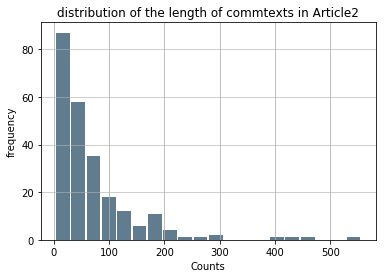

In [190]:
length_commtext(i).plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('distribution of the length of commtexts in Article{0}'.format(i))
plt.xlabel('Counts')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

## Time and Date in Pandas

In [158]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [160]:
date.strftime('%A')

'Saturday'

In [156]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

In [161]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [162]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [163]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [164]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [168]:
Date=pd.to_datetime(['July 1st 2015', '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
Date

DatetimeIndex(['2015-07-01', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [169]:
Date-Date[0]

TimedeltaIndex(['0 days', '3 days', '5 days', '6 days', '7 days'], dtype='timedelta64[ns]', freq=None)

In [170]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [171]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [172]:
pd.date_range('2015-07-03', periods=8, freq='H')   # a range of hourly timestamps

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [173]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [174]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')